 Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. & with two Different approachs 


In [35]:
!pip install category_encoders
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [36]:
company= pd.read_csv('Company_Data.csv')

In [37]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [43]:
company.shape

(400, 11)

In [41]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [38]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [44]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
#First convert target column Sales into Categorical column into categories Low, Medium and High.

company['Sales'] = pd.cut(x=company['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
company['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [5]:
#Check the value counts

company['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [6]:
# Converting other column data/attributes into categories

company['CompPrice'] = pd.cut(x=company['CompPrice'],bins=[76, 100, 134, 178], labels=['Low','Medium', 'High'], right = False)

company['Income'] = pd.cut(x=company['Income'],bins=[20, 45, 75, 122], labels=['Low','Medium', 'High'], right = False)

company['Advertising'] = pd.cut(x=company['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

company['Population'] = pd.cut(x=company['Population'],bins=[10, 165, 330, 520], labels=['Low','Medium', 'High'], right = False)

company['Price'] = pd.cut(x=company['Price'],bins=[24, 80, 140, 195], labels=['Low','Medium', 'High'], right = False)

company['Age'] = pd.cut(x=company['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

company['Education'] = pd.cut(x=company['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

The criteria to bin by.

Statistical data binning is a way to group numbers of more-or-less continuous values into a smaller number of "bins". For example, if you have data about a group of people, you might want to arrange their ages into a smaller number of age intervals (for example, grouping every five years together). It can also be used in multivariate statistics, binning in several dimensions at once.

In [7]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,Medium,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No


In [8]:
# Convert categorical value into numeric column --> Use encoding categorical data
label_encoder = preprocessing.LabelEncoder()

company['Sales'] = label_encoder.fit_transform(company['Sales'])
company['CompPrice'] = label_encoder.fit_transform(company['CompPrice'])
company['Income'] = label_encoder.fit_transform(company['Income'])
company['Advertising'] = label_encoder.fit_transform(company['Advertising'])
company['Population'] = label_encoder.fit_transform(company['Population'])
company['Price'] = label_encoder.fit_transform(company['Price'])
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Age'] = label_encoder.fit_transform(company['Age'])
company['Education'] = label_encoder.fit_transform(company['Education'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [9]:
#Print converted data for analtsis
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,2,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [10]:
# Dividing data into independent variables and dependent variable
X = company.drop('Sales', axis = 1)
y = company['Sales']

In [11]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,2,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [12]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [13]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 40)

In [14]:
# Print X & Y -> train  & test data

In [15]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
290,2,0,2,0,2,2,1,1,0,1
336,0,1,1,1,0,0,1,0,1,0
212,0,2,2,0,2,2,2,1,1,1
296,2,1,2,1,2,1,0,0,1,1
10,2,0,1,1,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
306,2,1,1,1,2,2,2,1,1,1
165,0,2,1,1,0,0,1,0,1,1
7,0,0,2,0,2,1,0,1,1,1
219,2,0,2,0,2,1,2,0,1,1


In [16]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,2,0,1,2,2,1,0,1,1,1
390,2,0,1,1,2,2,0,1,1,1
310,0,2,0,0,0,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
248,2,2,1,1,2,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
215,2,0,2,2,0,0,0,1,1,1
314,2,1,2,0,2,1,0,2,1,1
259,2,1,2,0,2,0,0,1,0,1
49,0,0,1,1,0,1,1,0,1,0


In [17]:
y_train

290    2
336    1
212    0
296    2
10     2
      ..
306    1
165    1
7      2
219    2
326    1
Name: Sales, Length: 268, dtype: int32

In [18]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,2,0,1,2,2,1,0,1,1,1
390,2,0,1,1,2,2,0,1,1,1
310,0,2,0,0,0,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
248,2,2,1,1,2,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
215,2,0,2,2,0,0,0,1,1,1
314,2,1,2,0,2,1,0,2,1,1
259,2,1,2,0,2,0,0,1,0,1
49,0,0,1,1,0,1,1,0,1,0


In [19]:
#Building model based on C5.0 Algorithm
#Building Decision Tree Classifier using Entropy Criteria

In [20]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

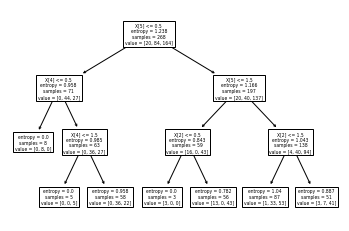

In [21]:
# Plotting Decision tree
tree.plot_tree(model_c5);

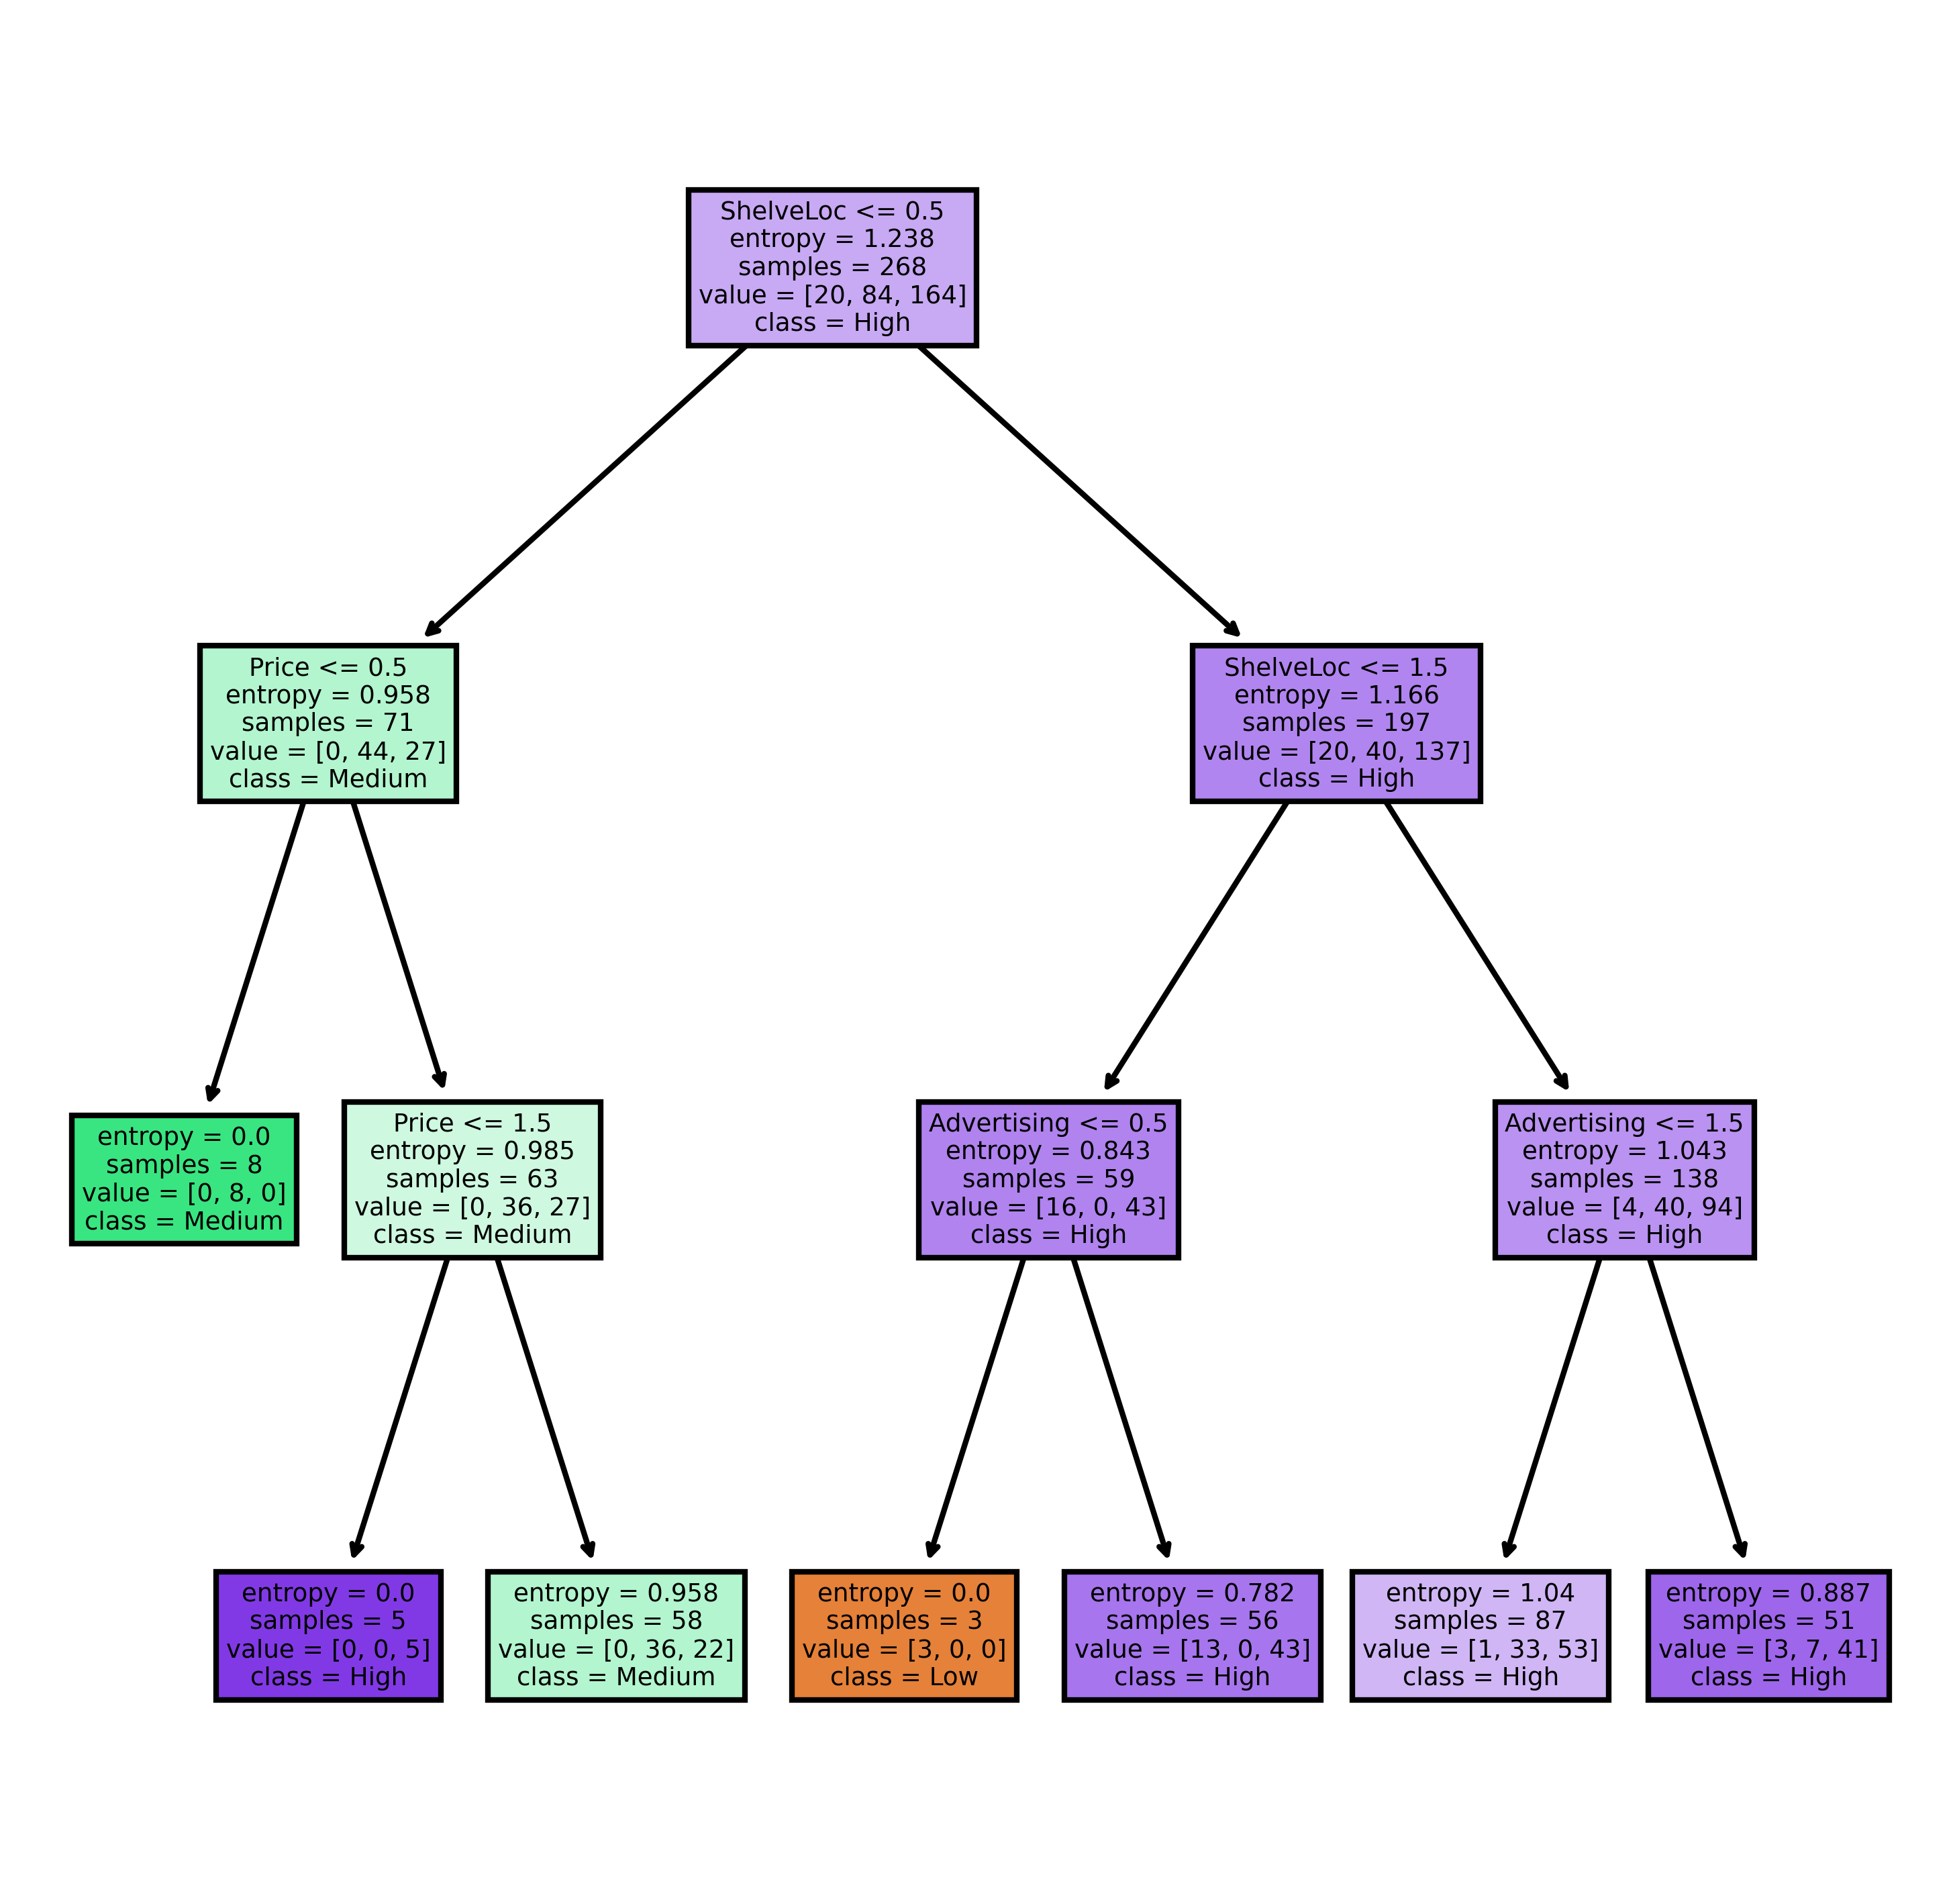

In [22]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
# Predicting Data
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()

2    107
1     24
0      1
dtype: int64

In [24]:
preds

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [25]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,0,0,7
1,0,16,30
2,1,8,70


In [26]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.6515151515151515

In [27]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [28]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

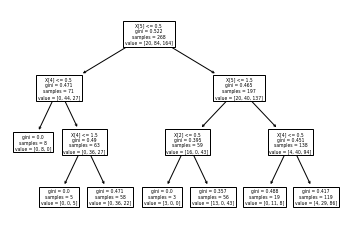

In [29]:
# Plotting Decision tree
tree.plot_tree(model_CART);

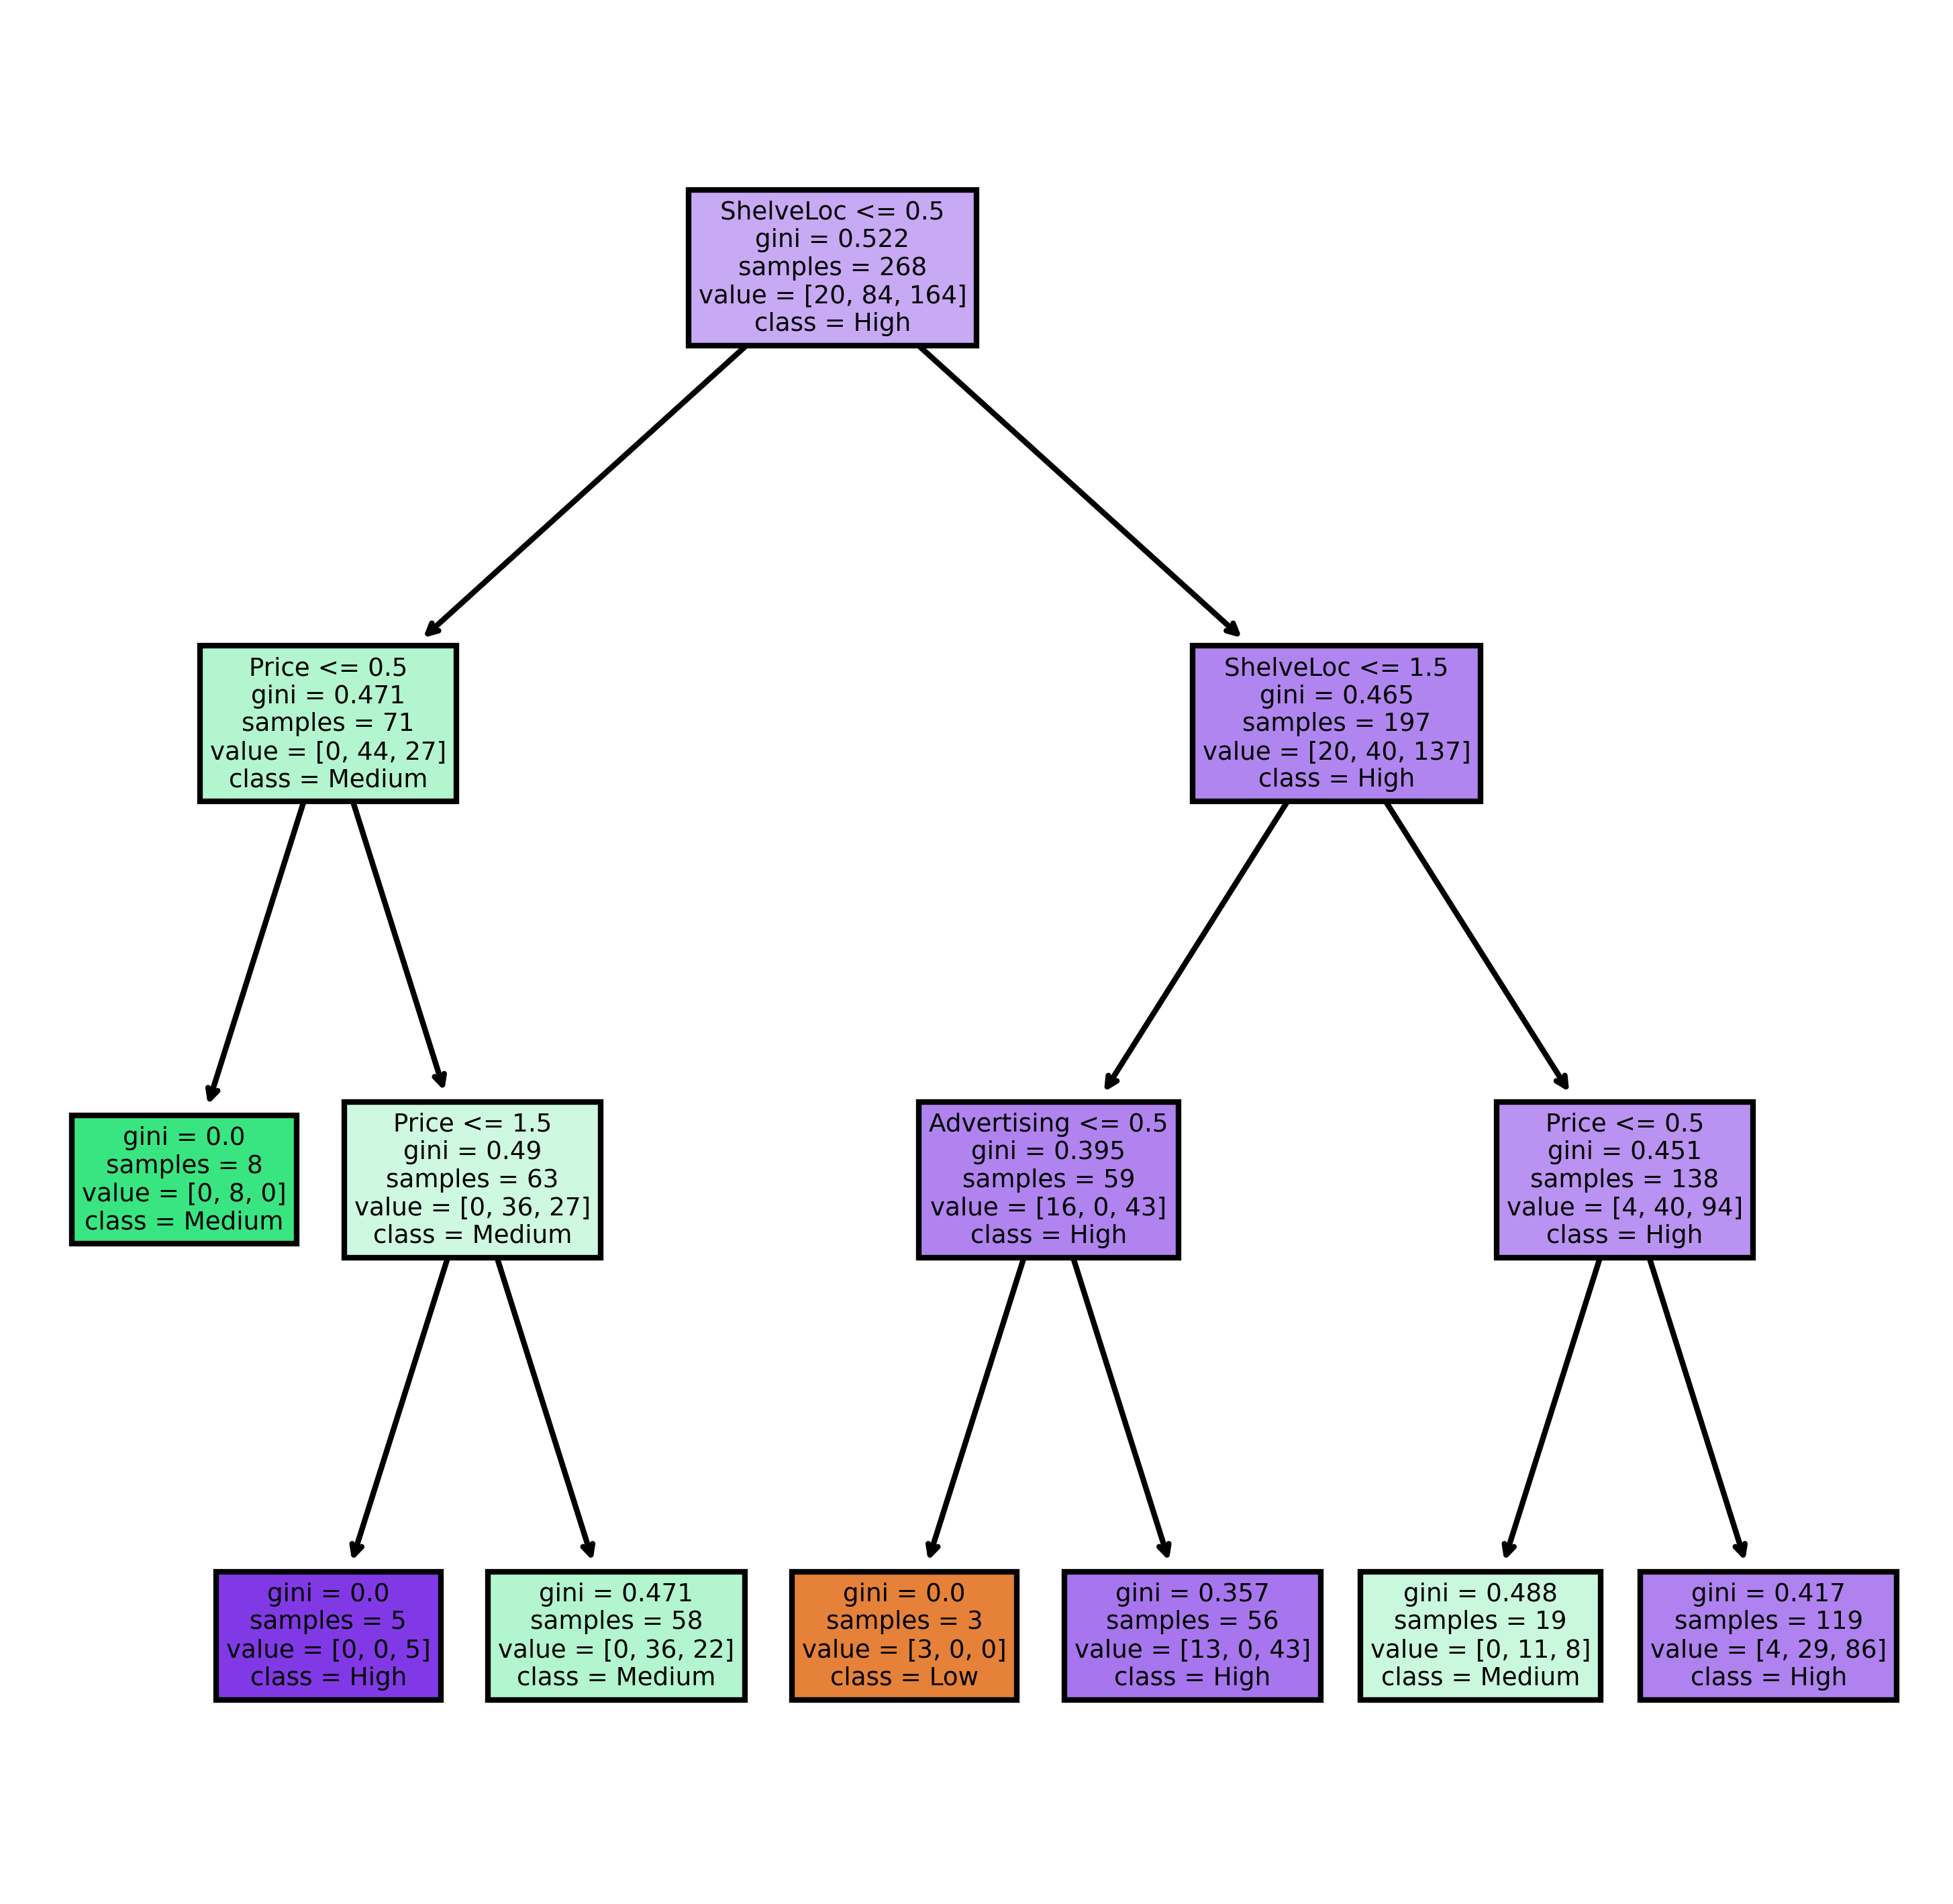

In [30]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [31]:
# Predicting Data
preds1 = model_CART.predict(x_test)
pd.Series(preds).value_counts()

2    107
1     24
0      1
dtype: int64

In [32]:
preds1

array([2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [33]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds1)

col_0,0,1,2
Sales,,,
0,0,0,7
1,0,24,22
2,1,10,68


In [34]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.696969696969697

## Different approach

In [45]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company1 = encoder.fit_transform(company)

In [46]:
company_val = []
for value in company["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

company1["company_val"]= company_val

by gathering information on shelveLoc Urban and US we can get if the company has a higher valyes of sales which is more than 7.49 

In [47]:
company1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
5,10.81,124,113,13,501,72,1,78,16,2,1,high
6,6.63,115,105,0,45,108,3,71,15,1,2,low
7,11.85,136,81,15,425,120,2,67,10,1,1,high
8,6.54,132,110,0,108,124,3,76,10,2,2,low
9,4.69,132,113,0,131,124,3,76,17,2,1,low


In [48]:
x = company1.drop(['company_val','Sales'], axis =1)
y = company1['company_val']

In [49]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [50]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: company_val, Length: 400, dtype: object

In [51]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

## Decision Tree using Entropy

The algorithm calculates the entropy of each feature after every split and as the splitting continues on, it selects the best feature and starts splitting according to it.

In [52]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [53]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 78.4375


In [54]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [55]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)

Test data Accuracy is: 66.25
Train data Accuracy is: 90.9375


In [56]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [58]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test)*100)
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train)*100)

Test data Accuracy is: 70.0
Train data Accuracy is: 91.875


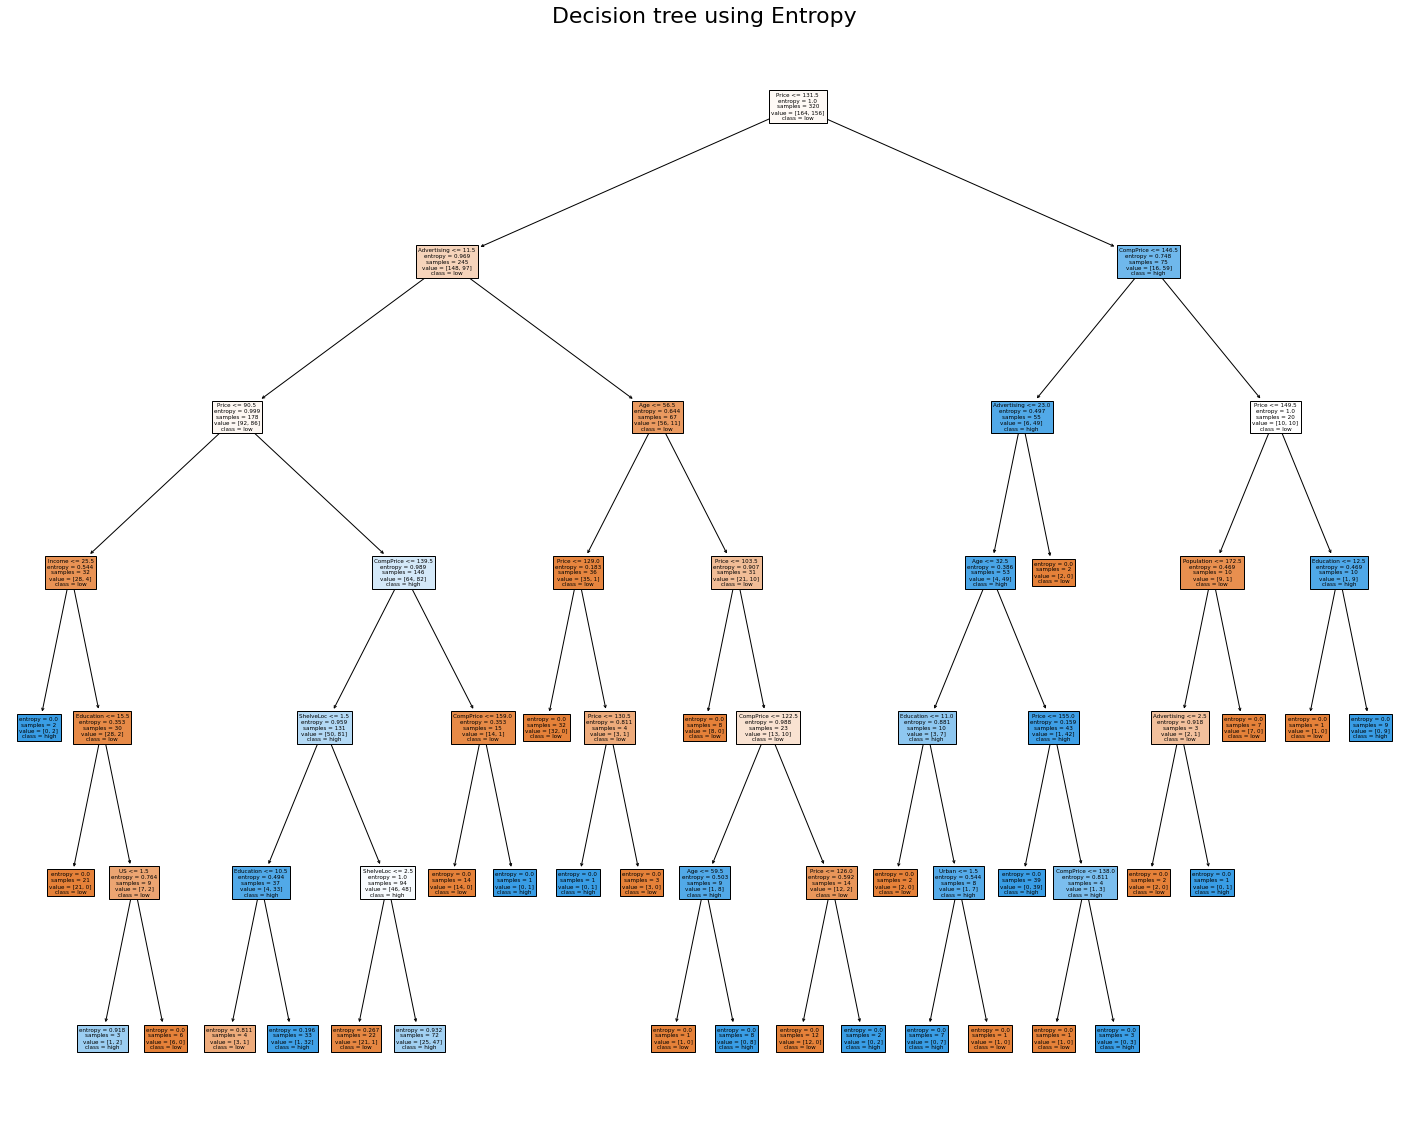

In [59]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

## Decision Tree using Gini

The Gini Index is the additional approach to dividing a decision tree.
Purity and impurity in a junction are the primary focus of the Entropy and Information Gain framework.
The Gini Index, also known as Impurity, calculates the likelihood that somehow a randomly picked instance would be erroneously cataloged. 

In [92]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [93]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 73.75
Train data Accuracy is: 88.75


In [94]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [95]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test)*100)
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train)*100)

Test data Accuracy is: 70.0
Train data Accuracy is: 92.5


In [106]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [107]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test)*100)
#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train)*100)

Test data Accuracy is: 71.25
Train data Accuracy is: 96.875


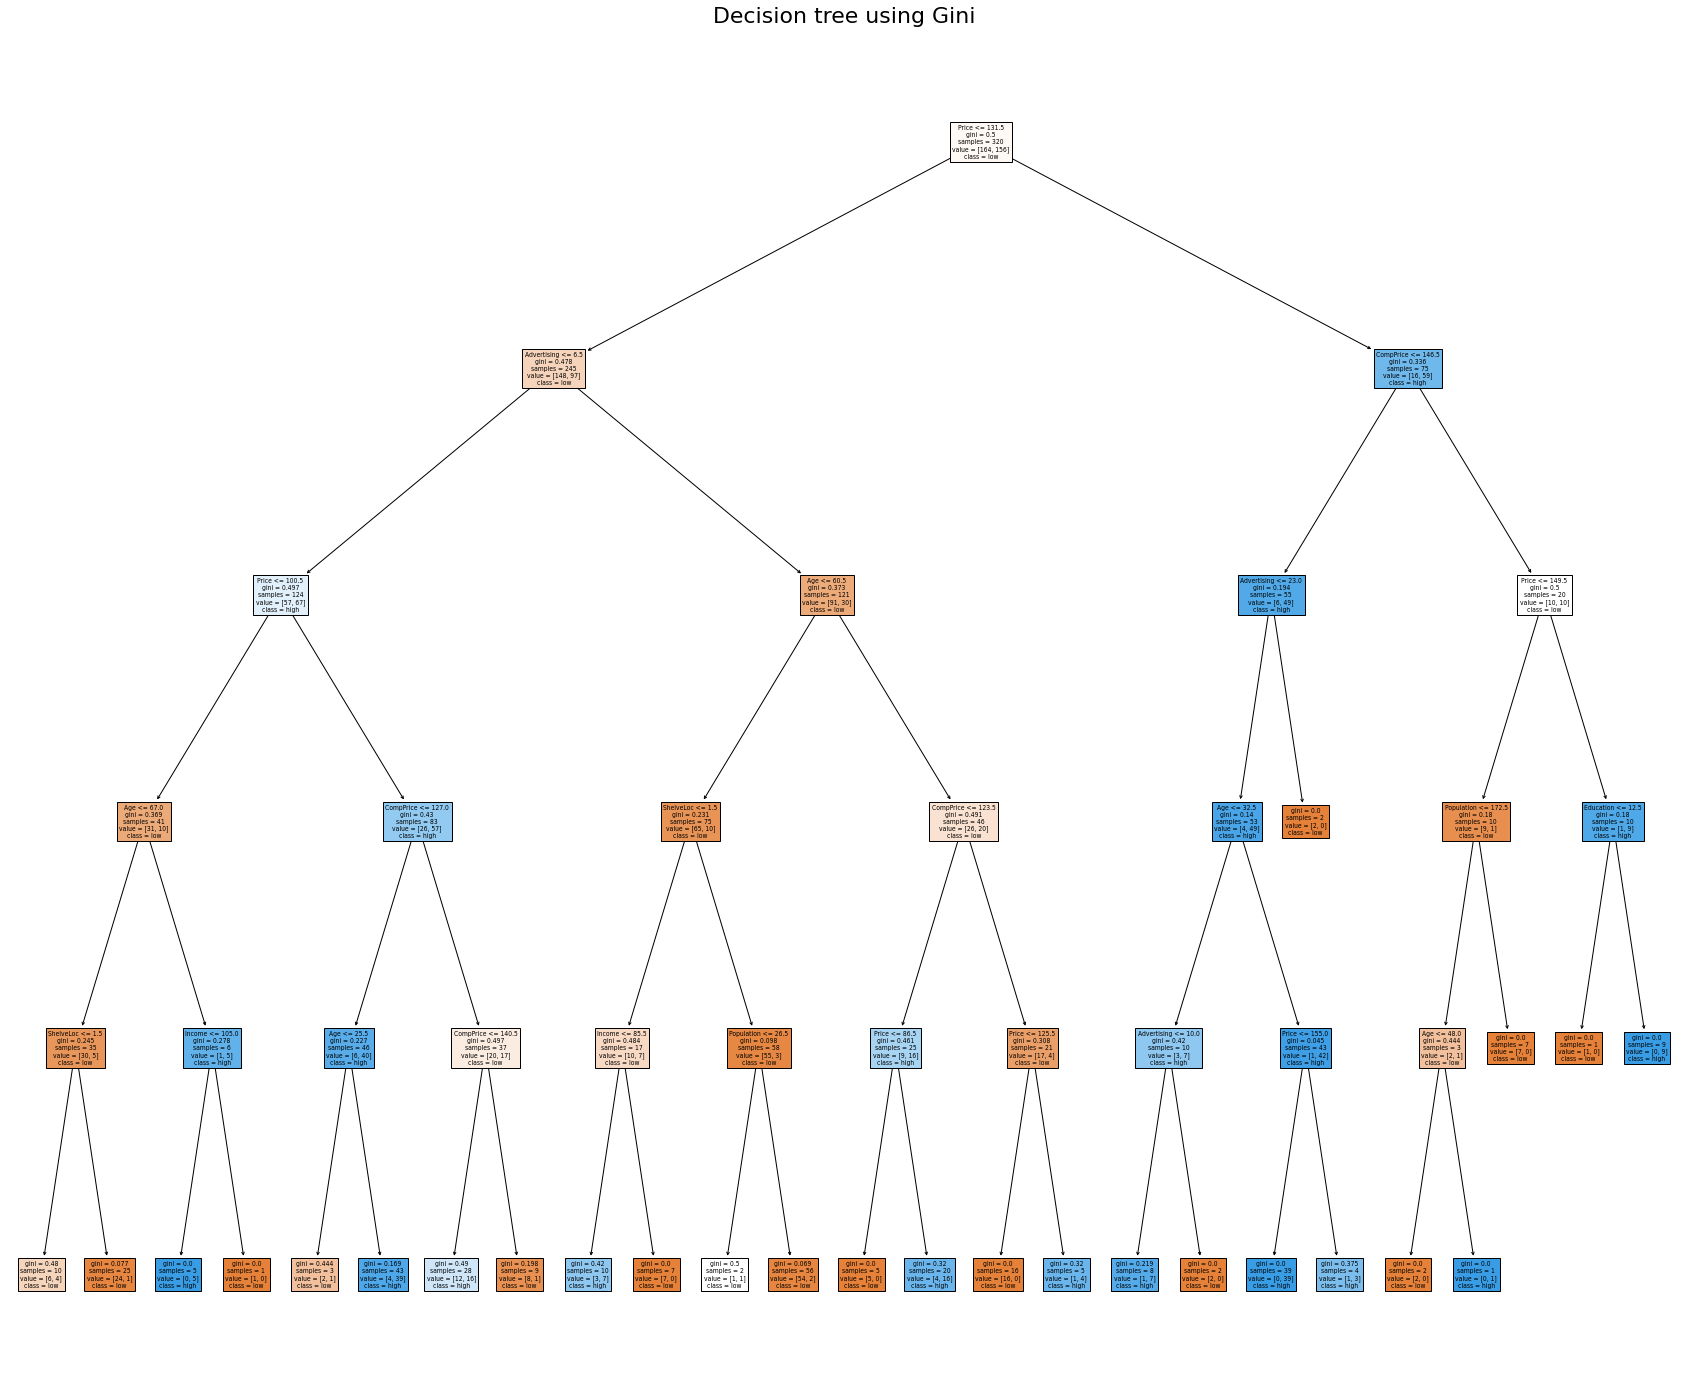

In [66]:
# let's plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini1,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')

In [67]:
preds = model_gini3.predict(x_test)
pd.Series(preds).value_counts()

high    41
low     39
dtype: int64

In [68]:
preds

array(['low', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'high', 'high', 'high', 'low', 'low', 'high',
       'high', 'high', 'high', 'low', 'high', 'high', 'high', 'low',
       'low', 'high', 'high', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'high', 'high',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'low', 'high'], dtype=object)

In [69]:
pd.crosstab(y_test,preds)

col_0,high,low
company_val,,
high,23,12
low,18,27


In [70]:
np.mean(preds==y_test)*100

62.5

Classification Report                precision    recall  f1-score   support

        high       0.56      0.66      0.61        35
         low       0.69      0.60      0.64        45

    accuracy                           0.62        80
   macro avg       0.63      0.63      0.62        80
weighted avg       0.63      0.62      0.63        80



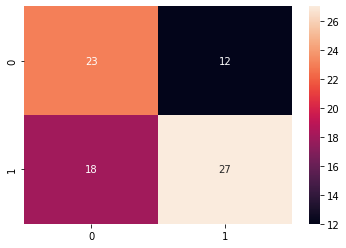

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, preds),annot=True,fmt = "d")
print('Classification Report ',classification_report(y_test,preds))

Conclusion: It ought to be emphasized that there is no one appropriate approach for evaluating unpredictability or impurities, and that the decision between the Gini and entropy varies significantly on the particular circumstance and methodology being employed.